In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import models
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Data is divided into training set and test set
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()
print(trainImages.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


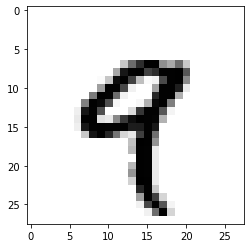

In [ ]:
digit = trainImages[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
# Building the model
network = models.Sequential()
network.add(keras.layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
network.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# Compilation
network.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
# Data preprocessing
trainImages = trainImages.reshape((60000, 28 * 28))
trainImages = trainImages.astype("float32") / 255
testImages = testImages.reshape((10000, 28 * 28))
testImages = testImages.astype("float32") / 255

In [ ]:
# Encoding the labels
trainLabels = to_categorical(trainLabels)
testLabels = to_categorical(testLabels)

In [ ]:
# Training
network.fit(trainImages, trainLabels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2564 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1037 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0686 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0495 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0377 - accuracy: 0.9884


In [ ]:
# Check accuracy
testLoss, testAcc = network.evaluate(testImages, testLabels)
print("Test accuracy: ", testAcc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9791
Test accuracy:  0.9790999889373779
